# Задание 1

In [10]:
pip install scipy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [12]:
data = norm.rvs(loc=0, scale=1, size=100)

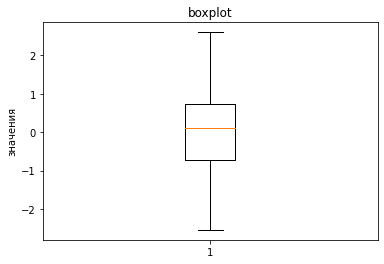

In [13]:
plt.boxplot(data)
plt.title("boxplot")
plt.ylabel("значения")
plt.show()

In [14]:
data2 = [79, 80, 80, 80, 74, 80, 80, 79, 64, 78, 73, 78, 74, 45, 81, 48, 80, 82, 82, 70]

Q25 = np.percentile(data2, 25)
Q50 = np.percentile(data2, 50)
Q75 = np.percentile(data2, 75)
print("Q25 :", Q25)
print("Q50 :", Q50)
print("Q75 :", Q75)

Q25 : 73.75
Q50 : 79.0
Q75 : 80.0


In [15]:
IQR = Q75 - Q25
print("межквартильный размах:",IQR)

межквартильный размах: 6.25


In [16]:
min_value = np.min(data2)
max_value = np.max(data2)
print("минимум:", min_value)
print("Q25:",Q25)
print("медиана:",Q50)
print("Q75:", Q75)
print("максимум:", max_value)

минимум: 45
Q25: 73.75
медиана: 79.0
Q75: 80.0
максимум: 82


выбросы считаем по тому же принципу, что и к боксплоте (через межквартильный размах, умноженный на 1.5)

In [17]:
lower_bound = Q25 - 1.5 * IQR
upper_bound = Q75 + 1.5 * IQR
outliers = [x for x in data2 if x < lower_bound or x > upper_bound]
print("потенциальные выбросы:", outliers)

потенциальные выбросы: [64, 45, 48]


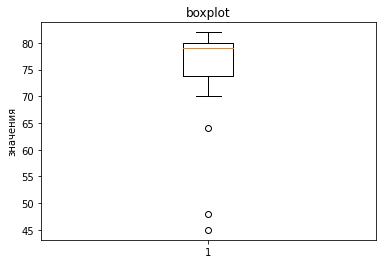

In [18]:
plt.boxplot(data2)
plt.title("boxplot")
plt.ylabel("значения")
plt.show()

# Задание 2

выбрала эти файлы:

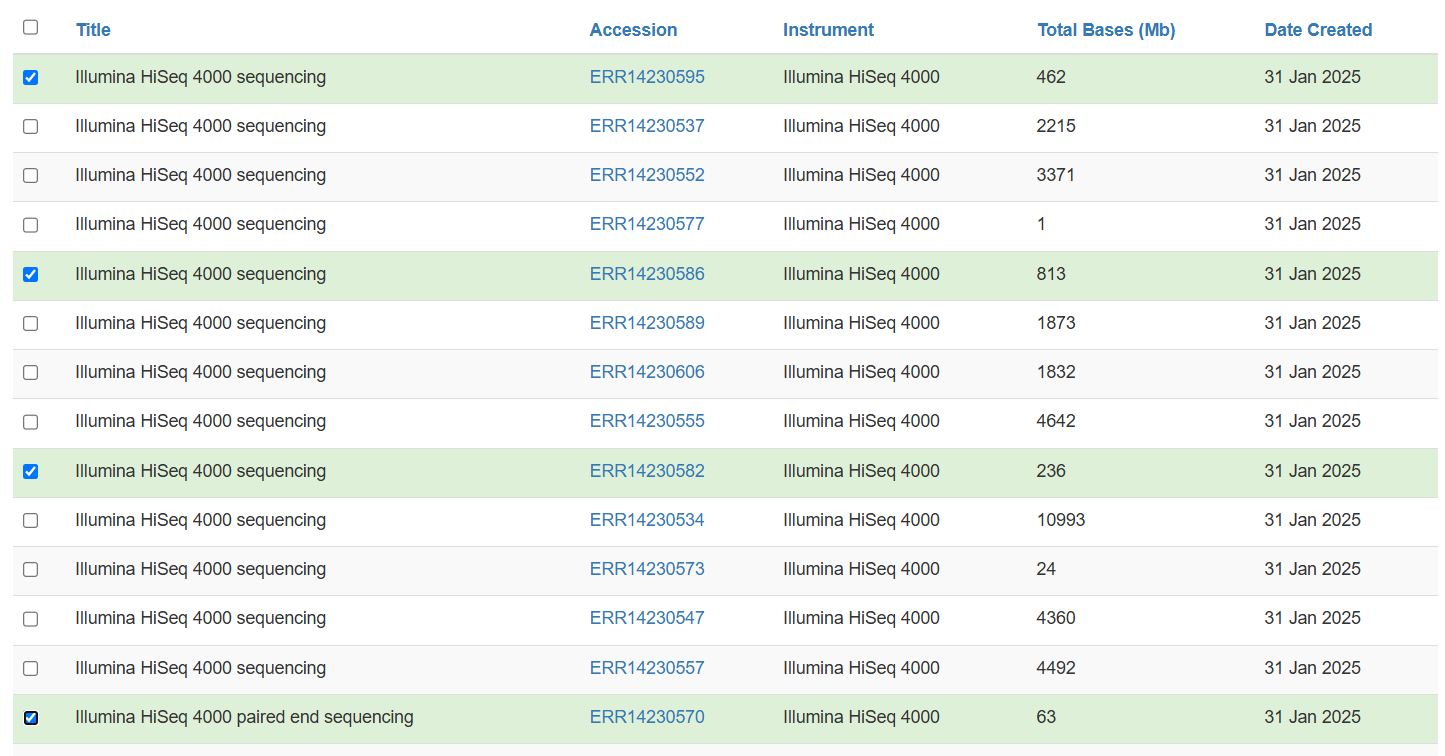

вот скрипт:

In [25]:
#!/bin/bash
#SBATCH --job-name=fastqc_multiqc
#SBATCH --output=fastqc_multiqc.out
#SBATCH --error=fastqc_multiqc.err
#SBATCH --ntasks=1
#SBATCH --cpus-per-task=4
#SBATCH --time=01:00:00
#SBATCH --mem=4G
#SBATCH --partition=short

source ~/.bashrc
export PATH="$HOME/.conda/envs/multiqc_tutorial/bin:$PATH"

echo "=== Debugging ==="
echo "PATH: $PATH"
echo "FastQC path: $(which fastqc)"
echo "Conda env: $CONDA_DEFAULT_ENV"

DATA_DIR="/home/aandreeva/hw/hw_9"
OUTPUT_DIR="${DATA_DIR}/fastqc_results"
mkdir -p "$OUTPUT_DIR"

for file in "$DATA_DIR"/*.fastq; do
    echo "Processing $file"
    fastqc "$file" --outdir="$OUTPUT_DIR" --threads="$SLURM_CPUS_PER_TASK"
done

multiqc "$OUTPUT_DIR" --outdir "${DATA_DIR}/multiqc_report"

SyntaxError: invalid syntax (27387917.py, line 11)